**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

## *A Comparison of Support Vector Machines and XGBoosting  in Music Genre Classification* 

#### Requirements:
``pip3 install seaborn``  
``pip3 install xgboost``  
``pip3 install prince``  
``pip3 install matplotlib``  
``pip3 install -U scikit-learn``  
``pip3 install pandas``  
``pip3 install numpy``  
``pip3 install ipywidgets``  
``pip3 install ipython``

**Running time warning**  
*The model fitting may take a long time depending on the model. However we have run the notebook beforehand and you should be able to see the prints of the scores etc. so you don't have to run the fits again. Another note is that the Data Analysis section contains ipywidgets that will make the cells interactive. These cells should be run again to see the results of the data analysis and there should not be any running time issues with these.*

## Abstract

*This report contains the creation and testing of two complete machine learning  solutions for classifying music according to genre. The aim is to find out more about the performance of a hyped machine learning method called XGBoost versus a more traditional one, here Support vector Machines, in a high dimensional classification problem where the data is imbalanced such as the data in this problem.The first part of the report contains the data analysis of pre-processed audio data. The next part consists of processing the data and fitting the actual models as well as testing their performance. The solutions are also run on kaggle to see how they perform on test data, and scored based on their accuracy and log loss. The solutions in the accuracy scores are Kernel Support Vector Machines with Grid Search For Multiclass Classification and XGBoost Gradient Boosting with Grid Search and Hyperparameter Fine Tuning, while the solutions for the log loss competition are Linear Support Vector Machines for Multiclass Probability Classification and XGBoost for Multiclass Probability Classification. After analysing and ranking the scores it is apparent that Support Vector Machines perform better in both competitions and also outperform XGBoosting in training running time. XGBoosting only outperforms Support Vector Machines in prediction running time and in the accuracy and log loss competitions when the data is not normalized.*




## 1. Introduction

*The goal is to learn how to implement a complete machine learning solution using the tools that have been taught during the course as well as implementing new tools such as the library scikit learn. In this project we will be designing a complete machine learning solution for classifying music according to genre.*  
  
*So, what is sound? Sound is a sequence of pressure waves that propagate through a medium such as air or water. When this pressure wave hits your ear, a series of biological reactions occur, that result in your brain interpreting it as a sound. In this project the pressure waves of different songs have been converted to electrical signals and further into a discrete digital signal. The data has then been further preprocessed into a form that can be readily used for developing a machine learning method [[1](#[1])].*   

*In this project a predictor h(x) is created for each genre Y, which takes the features x of the pre-processed songs, and and computes the probability h(x) that the song belongs to a specific genre, e.g. “Rap”. The genres used in this project are “Pop Rock”, “Electronic”, “Rap”, “Jazz”, “Latin”, “RnB”, “International”, “Country”, “Reggae” and “Blues”. A pre-processed data set of songs with carefully chosen features are used to compute a predictor.*  
  
*Using this method of grouping songs can be useful when putting music into categories. Companies such as Youtube and Spotify can use this kind of categorisation for recommendation or discovery services. However, classifying music according to genre is not easy because some genres can be fairly similar, e.g. rock and blues. To achieve an as accurate as possible model three main components of music are compared: timbre, pitch and rhythm.*  
  
*The first part of the project consists of analysing and processing the data and dividing it up into features timbre, pitch and rhythm. Then we will be moving on to fitting a model. We were particularly intrested in the performance of a hyped machine learning method called XGBoost versus a more traditional one in a high dimensional classification problem where the data is imbalanced such as the data in this problem. In the end we chose to compare XGBoost with hyperparameter fine tuning against Support Vector Machines. These methods are used for both the accuracy competition and the logloss competition. Grid search is used for all the models. Finally we visualize our results and discuss the results and the performance of our solution. We wish to find out which method gives us the best results when applied to the test data.*

## 2. Data analysis  
  
*We will begin with visualising the pre-processed visual data. Based on the results of the visualisation we have the options of choosing how to scale it, and possibly get rid of faulty data points or features. Our assumption is that the training data and the test data are similar. After separating the data into three features (rhythm, chroma and mfcc), we will further multi-index the data.*

In [1]:
import pandas as pd
import numpy as np
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

### 2.1 Quick view of the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0E4DBDB0>]],
      dtype=object)

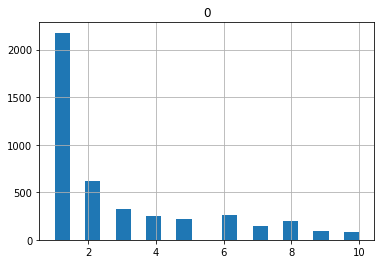

In [2]:
test = pd.read_csv('test_data.csv', header=None)
train = pd.read_csv('train_data.csv', header=None)
train_labels = pd.read_csv('train_labels.csv', header=None)
train_labels.hist(bins=20)

*We see that most of the training labels are labelled as one. Our resulting label distribution should be similar to this histogram. Let's see what the data looks like by printing the first ten rows of the training set.*  



In [3]:
train.head(n=10)

,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
0,1040.70,2315.6,2839.1,2552.2,2290.4,1913.8,2152.6,1930.3,2079.3,1706.70,...,0.216490,0.365480,0.093584,0.166870,0.083426,0.118090,0.089792,0.074371,0.073162,0.059463
1,2309.40,4780.4,4055.7,3120.5,1979.9,2343.6,2634.2,3208.5,3078.0,3374.70,...,0.100670,0.147390,0.102560,0.213040,0.082041,0.080967,0.076450,0.052523,0.052357,0.055297
2,2331.90,4607.0,4732.3,5007.0,3164.9,3171.9,2915.7,3282.3,2400.0,1895.20,...,0.126760,0.363210,0.114200,0.223780,0.100770,0.186910,0.067270,0.061138,0.085509,0.049422
3,3350.90,6274.4,5037.0,4609.7,3438.8,3925.8,3746.4,3539.4,3053.7,3075.40,...,0.096479,0.289500,0.074124,0.201580,0.049032,0.130210,0.045800,0.080885,0.148910,0.042027
4,2017.60,3351.8,2924.9,2726.3,1979.9,1930.9,2083.4,1889.2,1695.4,1911.70,...,0.138340,0.382660,0.079402,0.063495,0.053717,0.086750,0.062090,0.048999,0.033159,0.070813
5,1229.80,3005.8,2818.4,2640.1,2329.1,2568.4,2772.1,3119.3,2505.8,2085.00,...,0.137290,0.065876,0.078278,0.058903,0.051245,0.049138,0.070669,0.067383,0.053383,0.037763
6,3936.10,6276.3,4768.8,4157.2,3658.2,3830.3,4421.3,3712.8,3419.9,3437.60,...,0.139700,0.304990,0.033861,0.033922,0.072498,0.153120,0.042135,0.104470,0.040248,0.028059
7,556.39,1739.0,2072.0,2713.0,1828.7,2875.6,1739.8,1430.2,1531.4,785.59,...,0.117100,0.096197,0.119490,0.164570,0.041037,0.118390,0.076247,0.079585,0.051912,0.094960
8,2764.70,4442.6,3930.6,3504.1,2421.8,3012.6,3154.7,2665.7,2846.5,2595.20,...,0.175920,0.318960,0.039843,0.085944,0.062147,0.128530,0.070850,0.054834,0.127700,0.057441
9,3084.70,5645.9,5000.2,4001.9,2761.3,2946.5,2998.7,3141.1,3211.8,3374.60,...,0.123500,0.114340,0.018940,0.230170,0.069801,0.041104,0.038691,0.078276,0.074719,0.059803


*The data at first glance doesn't make a lot of sense, so let's categorize further.*  

### 2.2 Deeper Interactive Dive Into the Data

#### First we will multi-index the data to make it easy to parse

In [4]:
# Rythm part
rythm = train.iloc[:,0:168].copy()
statistics_r = ['mean', 'median', 'variance', 'kurtosis', 'skewness', 'min', 'max']
bands = ["band_{}".format(i) for i in range(24)]
index_r = pd.MultiIndex.from_product([statistics_r, bands])
rythm.columns = index_r

# Chroma part
chroma = train.iloc[:,168:216].copy()
statistics_c = ['mean', 'std', 'min', 'max']
pitches = ["pitch_{}".format(i) for i in range(12)]
index_c = pd.MultiIndex.from_product([statistics_c, pitches])
chroma.columns = index_c

# MFCC part
MFCC = train.iloc[:,216:].copy()
statistics_m = ['mean', 'std', 'min', 'max']
MFCCs = ["MFCC_{}".format(i) for i in range(12)]
index_m = pd.MultiIndex.from_product([statistics_m, MFCCs])
MFCC.columns = index_m

#### Let's create some helper functions first to visualize and view the data

In [5]:
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact, interactive, IntSlider, Layout
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
sns.set_style('whitegrid')

def get_data(data):
    if data == 'rythm':
        return rythm
    elif data == 'chroma':
        return chroma
    elif data == 'MFCC':
        return MFCC

def check_stats(stat, tail_head, scale, data):
    data = get_data(data)
    if stat == 'full' and tail_head == 'head':
        if scale == 'standardization':
            sc = StandardScaler()
            print(pd.DataFrame(sc.fit_transform(data)).head(n = 10))
        else:    
            print(data.head(n = 10))
    elif stat == 'full' and tail_head == 'tail':
        if scale == 'standardization':
            sc = StandardScaler()
            print(pd.DataFrame(sc.fit_transform(data)).tail(n = 10))
        else:  
            print(rythm.tail(n = 10))
    elif tail_head == 'head':
        if scale == 'standardization':
            sc = StandardScaler()
            print(pd.DataFrame(sc.fit_transform(data[stat])).head(n = 10))
        else:  
            print(data[stat].head(n = 10))
    else:
        if scale == 'standardization':
            sc = StandardScaler()
            print(pd.DataFrame(sc.fit_transform(data[stat])).tail(n = 10))
        else:  
            print(data[stat].tail(n = 10))
            
def plot_stats(stat, type, scale, data):
    sns.set_color_codes()
    data_df = get_data(data)
    melted_data = data_df[stat].melt(var_name=data, value_name='value')
    if scale == 'standardization':
        sc = StandardScaler()
        melted_data = pd.DataFrame(sc.fit_transform(data_df[stat])).melt(var_name=data, value_name='value')
        
    g = sns.FacetGrid(melted_data, col=data, col_wrap=4)
    
    if type == 'box':
        g.map(sns.boxplot, "value") 
    elif type == 'dist':
        g.map(sns.distplot, "value", rug=True)
    else:
        g.map(sns.distplot, "value", bins=10, kde=False, rug=False)
    

#### 2.2.1 Rythm

In [6]:
pl=interactive(check_stats,
               stat=['mean', 'median', 'variance', 'kurtosis', 'skewness', 'min', 'max','full'], 
               tail_head = ['tail', 'head'],
               scale=['standardization', 'None'],
               data = widgets.fixed('rythm'))
display(pl)

interactive(children=(Dropdown(description='stat', options=('mean', 'median', 'variance', 'kurtosis', 'skewnes…

*We can view the first and last ten rows of the data with the interactive cell above. Seems like there is a lot of variation between columns.*

In [7]:
pl=interactive(plot_stats, 
               stat=['mean', 'median', 'variance', 'kurtosis', 'skewness', 'min', 'max'], 
               type=['box', 'dist', 'hist'], 
               scale=['standardization', 'None'],
               data = widgets.fixed('rythm'))
    
display(pl)

interactive(children=(Dropdown(description='stat', options=('mean', 'median', 'variance', 'kurtosis', 'skewnes…

*It seems like scaling the rythm part of the data since the range of the data is over 10^3 so we need to even out the distributions here. Espescially the 24th rythm column for all the statistics show some abnormal values in comparison to other values. These can be seen clearly from the plots with different settings.* 

#### 2.2.2 Chroma

In [8]:
pl=interactive(check_stats, 
               stat=['mean', 'std', 'min', 'max','full'], 
               tail_head = ['tail', 'head'],
               scale=['standardization', 'None'],
               data = widgets.fixed('chroma'));
display(pl)

interactive(children=(Dropdown(description='stat', options=('mean', 'std', 'min', 'max', 'full'), value='mean'…

*The chroma part looks tolerable based on the tail and head of the data. Lets explore some more with plots.*

In [9]:
pl=interactive(plot_stats, 
               stat=['mean', 'std', 'min', 'max'], 
               type=['box', 'dist', 'hist'], 
               scale=['standardization', 'None'],
               data = widgets.fixed('chroma'));
display(pl)

interactive(children=(Dropdown(description='stat', options=('mean', 'std', 'min', 'max'), value='mean'), Dropd…

*We can tell from the histograms that the chroma part doesn't contain any abnormalities. Next up is the MFCC part of the data.*

#### 2.2.3 MFCC

In [10]:
pl=interactive(check_stats, 
               stat=['mean', 'std', 'min', 'max','full'], 
               tail_head = ['tail', 'head'],
               scale=['standardization', 'None'],
               data = widgets.fixed('MFCC'));
display(pl)

interactive(children=(Dropdown(description='stat', options=('mean', 'std', 'min', 'max', 'full'), value='mean'…

*There are some anomalies in the first four columns of the means of the MFCC-data. We will drop those columns from before fitting the models.*

In [11]:
pl=interactive(plot_stats, 
               stat=['mean', 'std', 'min', 'max'], 
               type=['box', 'hist'],  
               scale=['standardization', 'None'],
               data = 'MFCC');
display(pl)

interactive(children=(Dropdown(description='stat', options=('mean', 'std', 'min', 'max'), value='mean'), Dropd…

## 3. Methods and Experiments

## 3.1 Data Preprocessing  and Scaling
*Based on the analysis plots of the data we decide to remove some features from the data before we continue further. From the MFCC part of the data the first four mean values will be dropped. The decision is based on the plots above.*  
  
*Some methods perform better when the data is scaled and some others do not. For example SVM's usually require scaling and we noticed a significant increase in accuracy when the data was scaled. Generally standardisizing all values will reduce the distortion due to exceptionally high values and make some algorithms converge faster. We will standardize our data mainly for the PCA dimensionality reduction and SVM models.*

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train)

train_scaled = pd.DataFrame(scaler.transform(train))
test_scaled = pd.DataFrame(scaler.transform(test))

# Rythm part
rythm_train = train_scaled.iloc[:,0:168].copy()
rythm_test = test_scaled.iloc[:,0:168].copy()
statistics_r = ['mean', 'median', 'variance', 'kurtosis', 'skewness', 'min', 'max']
bands = ["band_{}".format(i) for i in range(24)]
index_r = pd.MultiIndex.from_product([statistics_r, bands])
rythm_train.columns = index_r
rythm_test.columns = index_r

# Chroma part
chroma_train = train_scaled.iloc[:,168:216].copy()
chroma_test = test_scaled.iloc[:,168:216].copy()
statistics_c = ['mean', 'std', 'min', 'max']
pitches = ["pitch_{}".format(i) for i in range(12)]
index_c = pd.MultiIndex.from_product([statistics_c, pitches])
chroma_train.columns = index_c
chroma_test.columns = index_c

# MFCC part
MFCC_train = train_scaled.iloc[:,216:].copy()
MFCC_test = test_scaled.iloc[:,216:].copy()
statistics_m = ['mean', 'std', 'min', 'max']
MFCCs = ["MFCC_{}".format(i) for i in range(12)]
index_m = pd.MultiIndex.from_product([statistics_m, MFCCs])
MFCC_train.columns = index_m
MFCC_test.columns = index_m

In [13]:
MFCC_test.columns = [''.join(col) for col in MFCC_test.columns]
MFCC_test.drop(columns = ['meanMFCC_0', 'meanMFCC_1', 'meanMFCC_2', 'meanMFCC_3'], axis=1, inplace=True)
MFCC_train.columns = [''.join(col) for col in MFCC_train.columns]
MFCC_train.drop(columns = ['meanMFCC_0', 'meanMFCC_1', 'meanMFCC_2', 'meanMFCC_3'], axis=1, inplace=True)

rythm_train.columns = [''.join(col) for col in rythm_train.columns]
rythm_test.columns = [''.join(col) for col in rythm_test.columns]

chroma_train.columns = [''.join(col) for col in chroma_train.columns]
chroma_test.columns = [''.join(col) for col in chroma_test.columns]

train_processed = pd.concat([rythm_train, chroma_train, MFCC_train], axis=1)
test_processed = pd.concat([rythm_test, chroma_test, MFCC_test], axis=1)

## 3.2 Feature Engineering  
**Installation:**``pip3 install prince``  
  
*We will use Principle Component Analysis (PCA) to reduce some redundancy from the data. A package called ``prince`` is used for this. We will reduce the dimensionality of the data to 240 PCA-features. Reducing the features will make the model fitting significantly faster and hopefully increase the accuracy of the models.*

In [14]:
import prince
pca = prince.PCA(
        n_components=240,
        n_iter=3,
        rescale_with_mean=True,
        rescale_with_std=True,
        copy=True,
        engine='auto',
        random_state=42
)
pca = pca.fit(train_processed)
pca_train = pca.transform(train_processed)
pca_test = pca.transform(test_processed)

#### Some Helper Functions for Writing Csvs and Plotting
*The first function is used to plot the the labels of the predicted model and training labels as a histogram. The training labels are plotted on top of the predicted labels so it helps us to see the similarities in the class distributions. The second function is used to write the csv's to the right format for kaggle competition.*

In [15]:
import matplotlib.pyplot as plt
import collections
import time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold

def plot_hists(predictions, train_labels=train_labels):
    cnt = collections.Counter()
    for label in predictions:
        cnt[label] += 1

    cnt2 = collections.Counter()
    for label in train_labels[0]:
        cnt2[label] += 1

    print("prediction labels:", cnt)
    print("vs.")
    print("Train labels:", cnt2)

    y = list(cnt.values())
    x = list(cnt.keys())
    y2 = list(cnt2.values())
    x2 = list(cnt2.keys())
    plt.bar(x, y, width=1.0, color='g')
    plt.bar(x2, y2, width=1.0, color='r', alpha=0.5)
    
def CSV(predictions, name):
    pred_df = pd.DataFrame({'Sample_label':predictions})
    pred_df.index += 1
    pred_df.to_csv(name, 
                   sep=',',  
                   header=True, 
                   index=True, 
                   index_label='Sample_id', 
                   mode='w', 
                   decimal='.')

## 3.3 Fitting the models
*Methods we used in the accuracy competition were: Support Vector Machines with grid search for best parameters. Other method that was used was gradient boosting called XGBoost.*
  
*Grid search was used for the first two models to fine tune the hyperparameters. This results in a significant increase in execution time but can improve the models significantly as well [[2](#[2])]. For XGBoost we also did some extensive hyperparameter fine tuning to find out the optimal parameter settings among the vast amount of parameters XGBoost offers. This means that we run the grid search for XGBoost several times and the execution time is therefore a lot longer than for the other models. However XGBoost can be run with multiple cores in parallel and we used that feature to lower the execution time.*  
  
**Note!**  
**``PC that was used for fitting has a 4-core intel i5 processor. The running times reflect the performance of that machine``**

### 3.3.1 Kernel Support Vector Machines with Grid Search For Multiclass Classification

**WARNING:**  
``Training running time: 7.182min``  
``Prediction running time: 0.13333min``  


**_Support Vector Machine Method:_**  
*Support Vector Machines are a supervised machine learning technique that are based on structural risk minimization. SVM tries
to find an optimized hyper-plane in a kernel space where training instances are linearly separable.[[3](#[3])]*

*Parameter ``C`` is a penalty parameter of the error term, we want to find the optimal penalty parameter so we do not penalize too much or too little to avoid over or underfitting the model. The ``C`` parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of ``C``, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. In other words``C`` behaves as a regularization parameter in the SVM. [[4](#[4])]*  
  
*Parameter ``gamma`` is a kernel coefficient for different kernels. Intuitively, the ``gamma`` parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The ``gamma`` parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors. [[4](#[4])]*  

**_Hyperparameter tuning with grid Search:_**  
*We will use a grid search algorithm for the given parameter grid below for hyperparameter tuning. The fitting can take a long time so we use only three searches, each model is fitted two times so we get 5 x 4 x 1 x 2 x 2 = 80 fits in total. We will also use two cores in parallel for the search. We will not use a ``linear`` kernel in the search because the execution time would skyrocket.*

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

scoring = {'logloss':'neg_log_loss', 'Accuracy': make_scorer(accuracy_score)}
param_grid = {'C':[10, 20, 65, 90, 102], 
              'gamma':[0.001, 0.1, 0.0001, 0.01], 
              'kernel':['rbf']}

grid_svc = GridSearchCV(SVC(probability=True), 
                        param_grid,
                        scoring=scoring, 
                        cv=2, 
                        refit='logloss',
                        return_train_score=True,
                        n_jobs=2,
                        verbose=0)

In [19]:
training_start = time.perf_counter()
grid_svc.fit(pca_train, train_labels)
training_end = time.perf_counter()

Best estimator:  SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 

Time consumed for training: 7.182 mins 

Time consumed for prediction: 0.13333 mins 

prediction labels: Counter({1: 4178, 2: 896, 3: 506, 4: 360, 6: 221, 8: 142, 5: 123, 9: 81, 10: 21, 7: 16})
vs.
Train labels: Counter({1: 2178, 2: 618, 3: 326, 6: 260, 4: 253, 5: 214, 8: 195, 7: 141, 9: 92, 10: 86})


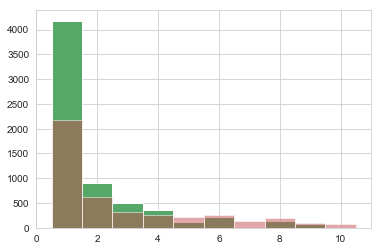

In [20]:
prediction_start = time.perf_counter()
predictions_svm = grid_svc.predict(pca_test)
prediction_end = time.perf_counter()

svm_train_time = training_end-training_start
svm_prediction_time = prediction_end-prediction_start

print("Best estimator: ", grid_svc.best_estimator_, "\n")
print("Time consumed for training: %4.3f mins" % (svm_train_time/60), "\n")
print("Time consumed for prediction: %6.5f mins" % (svm_prediction_time/60), "\n")
plot_hists(predictions_svm)

### 3.3.2 XGBoost Gradient Boosting with Grid Search and Hyperparameter Fine Tuning

**WARNING:**  
``Training running time: 28.77978min + 9.68299min + 11.39813min + 38.42624min +21.957011min = 1.83hour``  
``Prediction running time: 0.00571min``   
  
**Installation of the package:** ```pip3 install xgboost```  
  
**Or use this stackoverflow answer to install the package (windows).**  
https://stackoverflow.com/questions/33749735/how-to-install-xgboost-package-in-python-windows-platform/39811079#39811079

**_XGBoosting method:_**  
*Boosting is an Ensemble technique where a different model is trained with same data for each iteration. Each sample is assigned a different weight in each iteration. XGBoost can be prone to overfitting but with the tuning of hyperparameters this overfitting can be avoided.[[5](#[5])]*  
  
*XGBoost, short for eXtreme Gradient Boosting, is an advanced machine learning model implemented from gradient boosted decision trees. It is designed for speed and performance, and is powerful enough to deal with irregular data. XGBoost uses multiple parameters which have to be fine tuned to optimize the model, which is why improving a XGBoost model is difficult.[[6](#[6])]*  
  
*The parameters are divided into General Parameters, Booster Parameters and Learning Task Parameters. In our solution we have used a total of 11 parameters to optimize our model. ``Learning_rate`` makes the model more sturdy by shrinking the weights on each step, ``b_estimators`` denotes the number of sequential trees to be modeled and ``max_depth`` is used to control over-fitting. Higher values allow the model to learn relations that are specific to a particular sample. Min_child_weight is also used to control over-fitting. In this case higher values prevent the model from using relations that are specific to a particular sample. Parameter ``gamma`` is used to make the algorithm conservative by specifying the minimum loss reduction required to make a split, ``subsample`` gives the fraction of observations to be randomly selected for each tree and ``colsample_bytree`` indicates the fraction of columns to be random samples for each tree. Parameter ``objective`` defines the loss function that is to be minimized, ``nthread`` is used for parallel processing denoting the number of cores to be used, ``scale_pos_weight`` can be used to help in faster convergence in case of high class imbalance and seed is the random number seed used to generate reproducible “random” results.[[6](#[6])]*

**_Fine Tuning Hyperparameters with Multiple Grid searches_**:   
*We will fine tune the hyperparameters with multiple grid searches for the model. The fitting can take a long time so we use only three searches, each model is fitted three times so we get several different fits. We will use also four cores in parallel to make the algorithms run faster.*

In [22]:
from xgboost import XGBClassifier
import xgboost as xgb

# Parameter tuning for XGBoost
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

xgb_classifier = XGBClassifier(learning_rate =0.1, 
                               n_estimators=140,
                               max_depth=5,
                               min_child_weight=1, 
                               gamma=0, 
                               subsample=0.8, 
                               colsample_bytree=0.8,
                               objective='reg:gamma', 
                               nthread=4, 
                               scale_pos_weight=1, 
                               seed=27)

gsearch1 = GridSearchCV(estimator = xgb_classifier, 
                        param_grid = param_test1, 
                        n_jobs=4,
                        iid=False, 
                        cv=5)

In [23]:
xgb_train_start = time.perf_counter()
gsearch1.fit(pca_train, train_labels)
xgb_train_end = time.perf_counter()
xgb_training_time = xgb_train_end-xgb_train_start

In [26]:
print(gsearch1.best_params_)
print(gsearch1.best_score_)
print("Time consumed for training model: %6.5f mins" % (xgb_training_time/60))

{'max_depth': 3, 'min_child_weight': 3}
0.6176612330754834
Time consumed for training model: 28.77978 mins


In [24]:
param_test2 = {
 'min_child_weight':[6,8,10,12]
}

xgb_classifier = XGBClassifier(learning_rate=0.1, 
                               n_estimators=140, 
                               max_depth=7,
                               min_child_weight=5, 
                               gamma=0, 
                               subsample=0.8, 
                               colsample_bytree=0.8,
                               objective= 'reg:gamma', 
                               nthread=4, 
                               scale_pos_weight=1,
                               seed=27)

gsearch2 = GridSearchCV(estimator = xgb_classifier, 
                        param_grid = param_test2, 
                        n_jobs=4,
                        iid=False, 
                        cv=5)

In [25]:
xgb_train_start = time.perf_counter()
gsearch2.fit(pca_train, train_labels)
xgb_train_end = time.perf_counter()
xgb_training_time = xgb_train_end-xgb_train_start

In [26]:
print(gsearch2.best_params_)
print(gsearch2.best_score_)
print("Time consumed for training XGBoost model: %6.5f mins" % (xgb_training_time/60))

{'min_child_weight': 12}
0.6206667832191991
Time consumed for training XGBoost model: 9.68299 mins


In [27]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

xgb_classifier = XGBClassifier(learning_rate = 0.1, 
                               n_estimators=140, 
                               max_depth=7,
                               min_child_weight=12, 
                               gamma=0, 
                               subsample=0.8, 
                               colsample_bytree=0.8,
                               objective= 'reg:gamma', 
                               nthread=4, 
                               scale_pos_weight=1,
                               seed=27)

gsearch3 = GridSearchCV(estimator = xgb_classifier, 
                        param_grid = param_test3, 
                        n_jobs=4,
                        iid=False, 
                        cv=5)

In [28]:
xgb_train_start = time.perf_counter()
gsearch3.fit(pca_train, train_labels)
xgb_train_end = time.perf_counter()
xgb_training_time = xgb_train_end-xgb_train_start

In [29]:
print(gsearch3.best_params_)
print(gsearch3.best_score_)
print("Time consumed for training model: %6.5f mins" % (xgb_training_time/60))

{'gamma': 0.3}
0.6209066470960698
Time consumed for training model: 11.39813 mins


In [30]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

xgb_classifier = XGBClassifier(learning_rate=0.1, 
                               n_estimators=177, 
                               max_depth=7,
                               min_child_weight=12, 
                               gamma=0.3, 
                               subsample=0.8, 
                               colsample_bytree=0.8,
                               objective='reg:gamma',
                               nthread=4, 
                               scale_pos_weight=1,
                               seed=27)

gsearch4 = GridSearchCV(estimator = xgb_classifier,
                        param_grid = param_test4,
                        n_jobs=4,
                        iid=False,
                        cv=5)

In [31]:
xgb_train_start = time.perf_counter()
gsearch4.fit(pca_train, train_labels)
xgb_train_end = time.perf_counter()
xgb_training_time = xgb_train_end-xgb_train_start

In [32]:
print(gsearch4.best_params_)
print(gsearch4.best_score_)
print("Time consumed for training model: %6.5f mins" % (xgb_training_time/60))

{'colsample_bytree': 0.6, 'subsample': 0.7}
0.6252332781221216
Time consumed for training model: 38.42624 mins


In [33]:
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

xgb_classifier = XGBClassifier(learning_rate =0.1, 
                               n_estimators=177, 
                               max_depth=9,
                               min_child_weight=12, 
                               gamma=0.1, 
                               subsample=0.7, 
                               colsample_bytree=0.6,
                               objective='reg:gamma', 
                               nthread=4, 
                               scale_pos_weight=1,
                               seed=27)

gsearch5 = GridSearchCV(estimator = xgb_classifier, 
                        param_grid = param_test5, 
                        n_jobs=4,
                        iid=False,
                        cv=5)

In [34]:
xgb_train_start = time.perf_counter()
gsearch5.fit(pca_train, train_labels)
xgb_train_end = time.perf_counter()
xgb_training_time = xgb_train_end-xgb_train_start

In [39]:
print(gsearch5.best_params_)
print(gsearch5.best_score_)
print("Time consumed for training model: %6.5f mins" % (xgb_training_time/60))

{'colsample_bytree': 0.85, 'subsample': 0.8}
0.631206086070387
Time consumed for training model: 21.95701 mins


Best estimator:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.85, gamma=0.1, learning_rate=0.1,
       max_delta_step=0, max_depth=9, min_child_weight=12, missing=None,
       n_estimators=177, n_jobs=1, nthread=4, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.85) 

Time consumed for training: 25.391 mins 

Time consumed for prediction: 0.00571 mins 

prediction labels: Counter({1: 4639, 2: 783, 3: 467, 4: 225, 6: 173, 5: 102, 8: 99, 9: 38, 7: 12, 10: 6})
vs.
Train labels: Counter({1: 2178, 2: 618, 3: 326, 6: 260, 4: 253, 5: 214, 8: 195, 7: 141, 9: 92, 10: 86})


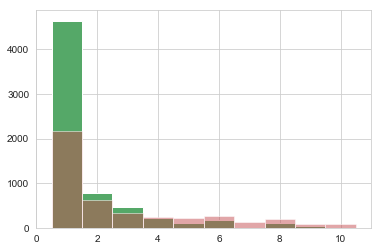

In [35]:
prediction_start = time.perf_counter()
predictions_xgb =gsearch5.predict(pca_test)
prediction_end = time.perf_counter()

xgb_prediction_time = prediction_end-prediction_start

print("Best estimator: ", gsearch5.best_estimator_, "\n")
print("Time consumed for training: %4.3f mins" % (xgb_training_time/60), "\n")
print("Time consumed for prediction: %6.5f mins" % (xgb_prediction_time/60), "\n")
plot_hists(predictions_xgb)

### 3.3.3 Linear Support Vector Machines for Multiclass Probability Classification

**WARNING:**  
``Training running time: 6.887min``  
``Prediction running time: 6.897min``  
  
**_Linear SVMs for multiclass probability classification (OneVsRest):_**  
*Linear SVM's support multiclass probability classification so we will use them to compare SVM's against XGBoosting in this part.*  
  
**Bagging technique:**  
*We will use an Ensemble technique called Bagging (Bootstrap Aggregating) to decrease the execution time substantially. In Bagging a subset of the data is taken and then trained to a set of different models. It should reduce variance and help to avoid overfitting.[[7](#[7])]*  

In [46]:
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier

n_estimators = 200
svm_multiclass = OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear', 
                                                           probability=False), 
                                                       max_samples=40/n_estimators, 
                                                       n_estimators=n_estimators))

start = time.time()
svm_multiclass.fit(pca_train, train_labels)
end = time.time()

In [50]:
print("Time consumed for bagging SVM training: %4.3f mins" % ((end - start)/60))
start = time.time()
proba = svm_multiclass.predict_proba(pca_test)
end = time.time()
print("Estimator: ", svm_multiclass, "\n")
print("Time consumed for bagging SVC predictions: %4.3f mins" % ((end - start)/60))

Time consumed for bagging SVM training: 6.887 mins
Time consumed for bagging SVC predictions: 6.897 mins


In [53]:
# Kaggle CSV format
pred_df = pd.DataFrame(proba)
pred_df.index += 1
pred_df.columns = ['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6', 'Class_7', 'Class_8', 'Class_9', 'Class_10']
pred_df.to_csv('SVM_multiclass_pca2.csv', 
               sep=',',  
               header=True, 
               index=True, 
               index_label='Sample_id', 
               mode='w', 
               decimal='.')

### 3.3.4 XGBboost for Multiclass Probability Classification

**WARNING:**  
``Training running time: 7.502min``  
``Prediction running time: 0.05142min``  
 
**_XGBoosting for multiclass probability classification method (OneVsRest):_**  
*In this solution for Multiclass Classification using XGBoost we have used the following 10 parameters: ``max_depth``, ``learning_rate (eta)``, ``silent``, ``objective``, ``num_class``, ``gamma``, ``subsample``, ``colsample_bytree``, ``n_estimators`` and ``eval_metric``. By setting objective to ``multi:softprob`` we set XGBoost to do multiclass classification. We also had to set ``num_class`` to the number of classes in our labelset. ``Eval_metric`` is used to validate data so we set it to ``mlogloss`` to give us the multiclass logloss. We also activated the silent mode so as to not print any running messages.[[6](#[6]), [8](#[8]), [9](#[9])]*



In [54]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

param = {
    'max_depth':9,
    'min_child_weight':12,
    'eta':0.05,
    'silent':1,
    'objective':'multi:softprob',
    'num_class':10,
    'gamma':0.1,
    'subsample':0.8,
    'colsample_bytree':0.9,
    'n_estimators':1000,
    'eval_metric':'mlogloss'}  

labels_multi = LabelEncoder()
y_train = labels_multi.fit_transform(train_labels.values)
X_train = pca_train.values

xgb_classifier = XGBClassifier(**param)

In [55]:
xgb_train_start = time.perf_counter()
xgb_classifier.fit(X_train, y_train, eval_metric='mlogloss')
xgb_train_end = time.perf_counter()

In [58]:
prediction_start = time.perf_counter()
preds = xgb_classifier.predict_proba(pca_test.values)
prediction_end = time.perf_counter()

xgb_training_time = xgb_train_end-xgb_train_start
xgb_prediction_time = prediction_end-prediction_start

print("Estimator: ", xgb_classifier, "\n")
print("Time consumed for training: %4.3f mins" % (xgb_training_time/60), "\n")
print("Time consumed for prediction: %6.5f mins" % (xgb_prediction_time/60), "\n")

Estimator:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, eta=0.05, eval_metric='mlogloss', gamma=0.1,
       learning_rate=0.1, max_delta_step=0, max_depth=9,
       min_child_weight=12, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, num_class=10, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=1, subsample=0.8) 

Time consumed for training: 7.502 mins 

Time consumed for prediction: 0.05142 mins 



In [59]:
# Kaggle CSV format
pred_df = pd.DataFrame(preds)
pred_df.index += 1
pred_df.columns = ['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6', 'Class_7', 'Class_8', 'Class_9', 'Class_10']
pred_df.to_csv('XGBoost_multiclass_pca.csv', 
               sep=',',  
               header=True, 
               index=True, 
               index_label='Sample_id', 
               mode='w', 
               decimal='.')

## 3.4 Evaluation methodology  
*We used K-Fold Cross Validation for model evaluation. K-Fold Cross Evaluation is an evaluation method used to estimate the skill of the model on new data.*  

  
*The general procedure is as follows:*

 1. Shuffle the dataset randomly
 2. Split the dataset into k groups
 3. For each unique group:
     1. Take the group as a hold out or test data set
     2. Take the remaining groups as a training data set
     3. Fit a model on the training set and evaluate it on the test set
     4. Retain the evaluation score and discard the model
 4. Summarize the skill of the model using the sample of model evaluation scores
 [[10](#[10])]

**_Performance Metrics used:_**
  
*__Accuracy for multiclass classification:__*  
*Classification accuracy is the number of correct predictions made as a ratio of all predictions made. This is the most common evaluation metric for classification problems, it is also the most misused. It is really only suitable when there are an equal number of observations in each class (which is rarely the case) and that all predictions and prediction errors are equally important, which is often not the case.* [[13](#[13])]  
  
*__Log loss for multiclass probabilities:__*  
*Log Loss is the most important classification metric based on probabilities. It's hard to interpret raw log-loss values, but log-loss is still a good metric for comparing models. For any given problem, a lower log-loss value means better predictions whereas for accuracy a larger value means a better prediction.*

### 3.4.1 Kernel SVM Model Evaluation  
  
**WARNING:**  
``3-Fold cross validation running time: 36.83511 seconds``

**``Accuracy score mean: 0.6520697773909084``**

In [37]:
cross_val_start = time.perf_counter()
accuracies_svm = cross_val_score(estimator = grid_svc.best_estimator_, X=pca_train, y=train_labels, cv=3)
cross_val_end = time.perf_counter()

svm_cross_val_time = cross_val_end-cross_val_start
print("Time consumed for 3-Fold cross validation: %6.5f seconds" % (svm_cross_val_time), "\n")
print('accuracy mean: ', accuracies_svm.mean())
print('accuracy std: ', accuracies_svm.std())
# CSV(predictions_svm, 'svm_labels.csv')

Time consumed for 3-Fold cross validation: 36.83511 seconds 

accuracy mean:  0.6520697773909084
accuracy std:  0.006388245623531938


### 3.4.2 XGBoosting Model Evaluation  
  
**WARNING:**  
``3-Fold cross validation running time: 82.22754 seconds``

**``Accuracy score mean: 0.6163100317761705``**

In [38]:
cross_val_start = time.perf_counter()
accuracies_xgb = cross_val_score(estimator = gsearch5.best_estimator_, X=pca_train, y=train_labels, cv=3)
cross_val_end = time.perf_counter()

xgb_cross_val_time = cross_val_end-cross_val_start
print("Time consumed for 3-Fold cross validation: %6.5f seconds" % (xgb_cross_val_time), "\n")
print('accuracy mean: ', accuracies_xgb.mean())
print('accuracy std: ', accuracies_xgb.std())
# CSV(predictions_xgb, 'xgb_labels.csv')

Time consumed for 3-Fold cross validation: 82.22754 seconds 

accuracy mean:  0.6163100317761705
accuracy std:  0.0052570544007903355


### 3.4.3 Linear SVM Multiclass Probability Model Evaluation
  
**WARNING:**  
``3-Fold cross validation running time: 9.08431min``  
  
**``Log Loss: -1.4261799781067401``**

In [70]:
cross_val_start = time.perf_counter()
log_loss_svm = cross_val_score(svm_multiclass, pca_train, train_labels, scoring='neg_log_loss', cv=3)
cross_val_end = time.perf_counter()

In [74]:
svm_cross_val_time = cross_val_end-cross_val_start
print("Time consumed for 3-Fold cross validation: %6.5f mins" % ((svm_cross_val_time)/60), "\n")
print('log loss mean: ', log_loss_svm.mean())
print('log loss std: ', log_loss_svm.std())

Time consumed for 3-Fold cross validation: 12.25361 mins 

log loss mean:  -1.4261799781067401
log loss std:  0.019569384136041576


### 3.4.4 XGBboost for Multiclass Probability Model Evaluation
  
**WARNING:**  
``3-Fold cross validation running time: 12.25361min``

**``Log Loss: -1.2879083790893804``**

In [73]:
cross_val_start = time.perf_counter()
log_loss_xgb = cross_val_score(xgb_classifier, pca_train, train_labels, scoring='neg_log_loss', cv=3)
cross_val_end = time.perf_counter()

In [76]:
xgb_cross_val_time = cross_val_end-cross_val_start
print("Time consumed for 3-Fold cross validation: %6.5f mins" % ((xgb_cross_val_time)/60), "\n")
print('log loss mean: ', log_loss_xgb.mean())
print('log loss std: ', log_loss_xgb.std())

Time consumed for 3-Fold cross validation: 12.25361 mins 

log loss mean:  -1.2879083790893804
log loss std:  0.026054138879414608


## 4. Results

### 4.1 Confusion matrices  
*Here are the confusion matrices for the models used in the accuracy competition.*
#### 4.1.1 SVM  
``Running time: 35.45342659950256sec``

In [44]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
start = time.time()
y_pred = cross_val_predict(estimator = grid_svc.best_estimator_, X=pca_train, y=train_labels, cv=3)
conf_mat = confusion_matrix(train_labels, y_pred)
end = time.time()
print("Running time:", (end-start))
print(conf_mat)

Running time: 35.45342659950256
[[1950  120   20   16   16   36    4   13    1    2]
 [ 194  370   22   15    4    8    0    3    2    0]
 [  61   26  215    2    1   12    0    0    9    0]
 [  92   21    3  110    4   16    3    1    1    2]
 [ 138   11    8    6   33    7    3    3    5    0]
 [ 118   11   19   12    6   86    0    4    4    0]
 [  94   13    4    7    4    6    5    3    4    1]
 [ 131    2    1    0    3    5    1   50    0    2]
 [  24    7   17    1    8   11    0    1   23    0]
 [  55    2    2    8    3    3    2    5    3    3]]


#### 4.1.2 XGboost  
``Running time: 78.00097107887268sec``

In [45]:
start = time.time()
y_pred = cross_val_predict(estimator = gsearch5.best_estimator_, X=pca_train, y=train_labels, cv=3)
conf_mat = confusion_matrix(train_labels, y_pred)
end = time.time()
print("Running time:", (end-start))
print(conf_mat)

Running time: 78.00097107887268
[[2011   83   19   15    7   23    0   17    3    0]
 [ 285  299   19    5    3    4    0    2    1    0]
 [  83   32  197    1    1    7    0    0    3    2]
 [ 138   26    1   72    4    7    1    2    1    1]
 [ 151    9    6    6   23    9    4    4    2    0]
 [ 157   14   26    5    6   46    0    4    1    1]
 [ 100   16    5    2    5    5    2    2    2    2]
 [ 152    1    1    3    4    1    0   33    0    0]
 [  39   13   20    2    4    6    1    1    6    0]
 [  68    2    4    8    1    1    1    1    0    0]]


### 4.2 Scores
#### 4.2.1 Accuracy scores
*SVMs performed better in the accuracy competition than XGBoosting. Below are the scores we acquired using the training data. According to the training data results the SVMs resulted in a score of 4 percent units higher than XGBoosting. This did not corresponded with kaggle results, where we got very similar scores to our SVM model but better scores on XGB model. This indicates that our SVM model works as well on the test data as on the training data, however the same cannot be said for XGBoost model.*  
  
**_Train data:_**  
``SVM: 0.6520697773909084``  
``XGBoost: 0.6163100317761705``  

*(best kaggle accuracy for SVM model: 0.66479)*  
*(best kaggle accuracy for XGBoost model: 0.66428)* 
  
#### 4.2.2 Logloss scores
*In the log loss competition we got very different values using the training data compared to the performance score on kaggle. Unfortunately we could not find out how to reproduce the results on kaggle, a reason might be that we are using the wrong function. According to our calculations XGBoost performed worse on the training data than SVMs, but on kaggle SVMs scored a much better score on log loss. We did however notice, that XGBoost performed better in both competitions on kaggle when the data was not standardized before fitting the model.*  
  
  
**_Train data:_**  
``SVM: -1.4261799781067401``  
``XGBoost: -1.2879083790893804``
  
*(best kaggle logloss for SVM model: 0.18888)*  
*(best kaggle logloss for XGBoost model: 0.19895)*

### 4.3 Running times
*We also decided to compare training running times and prediction running times to find the best performing model. Especially in the accuracy competition it is clear that SVMs are much faster than XGBoosting models, with 7.182 minutes and 1.83 hours respectively. This was due to the extensive hyperparameter fine tuning for the XGBoost model. There was not much of a difference in performance when comparing SVMs and XGBoosting for multiclass probability models, since the same hyperparameters were used for these models as in the accuracy competition.*  
  
**_Training running time:_**  
``Kernel SVM Model Evaluation: 7.182 min``  
``XGBoosting Model Evaluation: 1.83 hours``  
``Linear SVM Multiclass Probability Model Evaluation: 6.887 min``  
``XGBoost for Multiclass Probability Model Evaluation: 7.502 min``  

*Whereas SVMs are faster in training, we discovered that XGBoosting models perform better when doing predictions. The difference is not very big, but XGBoosting models outperformed SVMs in both the accuracy and log loss competition when it comes to prediction running time.*  
  
**_Prediction running time:_**  
``Kernel SVM Model Evaluation: 36.83511 sec``  
``XGBoosting Model Evaluation: 82.22754 sec``  
``Linear SVM Multiclass Probability Model Evaluation: 6.897 min``  
``XGBoost for Multiclass Probability Model Evaluation: 0.05142 min``  

*We also discovered that using PCA before fitting the models worsened the overall scores of the models, but made the fitting processes faster, which is why we in the end decided to keep the PCA processing in our solution.*




## 5. Discussion/Conclusions

*After analysing and ranking the scores it is apparent that Support Vector Machines perform better in both competitions and also outperforms XGBoosting in training running time. XGBoosting only outperforms Support Vector Machines in prediction running time and in the accuracy and log loss competitions. XGboost however performs significantly better on non-scaled data but they still did not reach the performance of the SVM models. From this we can conclude that SVMs work better on this particular set of imbalanced data points.*  
  
*Our results do not follow the general consensus found from literature. XGBoost is usually one of the top methods for any classification problems but here we show that for an imbalanced data set such as the data used in this project will not fit as well the XGBoost model as it does in a more traditional SVM model.*  
  
*This is a clear indication that XGBoost is not always the superior method for multiclass classification problems even though the performance of the method is well shown in literature and in multiple Kaggle competitions.[[11](#[11]), [12](#[12])]*  
  
**_About model evaluation metrics:_**  
*Accuracy is a metric based on a threshold and a qualitative understanding of error. This measure is used when we want a model to minimise the number of errors. Hence, the metric is usual in many direct applications of classifiers. Logloss (cross entropy) is a metric based on a probabilistic understanding of error, i.e. measuring the deviation from the true probability.*  
  
*As we pointed out in chapter 2.1 the training data is highly imbalanced with most data points belonging to a class labeled as 1. Among other things this can cause problems in the accuracy scores, where the accuracy measure only reflects the imbalance in the dataset by giving the majority class an advantage if the accuracy is used for guiding the learning process. To get a better fitting model a dataset where the classes are represented equally would give better results.*  
  
*The same applies to LogLoss since the metric does use the class predictions from the decision function, but weights each type of misclassification equally. This makes the metric lose it's precision and for that it is not a robust metric for class imbalance. Log loss should incorporate misprediction costs to account for class imbalance.*
  
*To combat the imbalance issue a larger dataset could be a solution as it might expose a different and more balanced perspective on the classes. This could be done by collecting more data or generating synthetic samples. If we had more resources it would also be good practice to try out even more algorithms. In this project we played around with Random Forests and Decision Trees as well but quickly found out that SVMs and XGBoosts outperformed them. If collecting more data isn’t possible, we could try using Penalized Models instead in order to force the models to pay more attention to the minority classes.*
 
*To conclude this report, it is safe to say that highly popular machine learning methods are not always the best option. In this report we showed that the more traditional SVM model outperformed XGBoost when using a highly inblanced training dataset. It is always worthwhile to try out a few different algorithms to get a glimpse of what might or might not work with that specific dataset.*



## 6. References

##### [1]   
*https://www.toptal.com/algorithms/shazam-it-music-processing-fingerprinting-and-recognition*  
##### [2]  
*https://en.wikipedia.org/wiki/Hyperparameter_optimization#Grid_search*  
##### [3]   
http://www.svms.org/srm/  
##### [4]   
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC  
##### [5]   
https://datastoriesweb.wordpress.com/category/classification/  
##### [6]  
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/  
##### [7]  
https://en.wikipedia.org/wiki/Bootstrap_aggregating  
##### [8]  
https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters  
##### [9]  
https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/  
##### [10]    
https://machinelearningmastery.com/k-fold-cross-validation/  
#### [11]  
https://medium.com/syncedreview/tree-boosting-with-xgboost-why-does-xgboost-win-every-machine-learning-competition-ca8034c0b283 
#### [12]
https://www.kaggle.com/c/otto-group-product-classification-challenge/discussion/14335
#### [13]
https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/

## 7. Appendix
  
*We also tried Multiple Factor Analysis for dimensionality reduction, which did not turn out to be as efficient as PCA in term of the scores. We tried also XGBoosting without PCA and scaling the data, but the running times were even longer than with PCA so we decided to not include those results in the models discussed even though XGBoost performed almost as well as the best SVMs when the data was not scaled. Below is the code for Multiple Factor Analysis if one wants to use that for dimensionality reduction. XGBoost can also be run without scaling the data by just commenting out the scalers in the code above and make sure that the models are fitted to right data.*

In [ ]:
scaler = StandardScaler()
scaler.fit(train)

# Hack
scaler2 = StandardScaler()
test_scaled = pd.DataFrame(scaler2.fit_transform(test))

train_scaled = pd.DataFrame(scaler.transform(train))
# test_scaled = pd.DataFrame(scaler.transform(test))

# Rythm part
rythm_train = train_scaled.iloc[:,0:168].copy()
rythm_test = test_scaled.iloc[:,0:168].copy()
statistics_r = ['mean', 'median', 'variance', 'kurtosis', 'skewness', 'min', 'max']
bands = ["band_{}".format(i) for i in range(24)]
index_r = pd.MultiIndex.from_product([statistics_r, bands])
rythm_train.columns = index_r
rythm_test.columns = index_r

# Chroma part
chroma_train = train_scaled.iloc[:,168:216].copy()
chroma_test = test_scaled.iloc[:,168:216].copy()
statistics_c = ['mean', 'std', 'min', 'max']
pitches = ["pitch_{}".format(i) for i in range(12)]
index_c = pd.MultiIndex.from_product([statistics_c, pitches])
chroma_train.columns = index_c
chroma_test.columns = index_c

# MFCC part
MFCC_train = train_scaled.iloc[:,216:].copy()
MFCC_test = test_scaled.iloc[:,216:].copy()
statistics_m = ['mean', 'std', 'min', 'max']
MFCCs = ["MFCC_{}".format(i) for i in range(12)]
index_m = pd.MultiIndex.from_product([statistics_m, MFCCs])
MFCC_train.columns = index_m
MFCC_test.columns = index_m

In [ ]:
MFCC_test.columns = [''.join(col) for col in MFCC_test.columns]
MFCC_test.drop(columns = ['meanMFCC_0', 'meanMFCC_1', 'meanMFCC_2', 'meanMFCC_3'], axis=1, inplace=True)
MFCC_train.columns = [''.join(col) for col in MFCC_train.columns]
MFCC_train.drop(columns = ['meanMFCC_0', 'meanMFCC_1', 'meanMFCC_2', 'meanMFCC_3'], axis=1, inplace=True)

rythm_train.columns = [''.join(col) for col in rythm_train.columns]
rythm_train.drop(columns = ['meanband_23', 'medianband_23', 'varianceband_23', 'kurtosisband_23', 'minband_23', 'maxband_23'], 
           axis=1, 
           inplace=True)

rythm_test.columns = [''.join(col) for col in rythm_test.columns]
rythm_test.drop(columns = ['meanband_23', 'medianband_23', 'varianceband_23', 'kurtosisband_23', 'minband_23', 'maxband_23'], 
           axis=1, 
           inplace=True)

chroma_train.columns = [''.join(col) for col in chroma_train.columns]
chroma_test.columns = [''.join(col) for col in chroma_test.columns]

train_processed = pd.concat([rythm_train, chroma_train, MFCC_train], axis=1)
test_processed = pd.concat([rythm_test, chroma_test, MFCC_test], axis=1)

groups = {
    'mean_rythm':['meanband_{}'.format(i) for i in range(23)],
    'median_rythm':['medianband_{}'.format(i) for i in range(23)],
    'variance_rythm':['varianceband_{}'.format(i) for i in range(23)],
    'kurtosis_rythm':['kurtosisband_{}'.format(i) for i in range(23)],
    'skewness_rythm':['skewnessband_{}'.format(i) for i in range(23)],
    'min_rythm':['minband_{}'.format(i) for i in range(23)],
    'max_rythm':['maxband_{}'.format(i) for i in range(23)],
    'mean_chroma':['meanpitch_{}'.format(i) for i in range(12)],
    'std_chroma':['stdpitch_{}'.format(i) for i in range(12)],
    'min_chroma':['minpitch_{}'.format(i) for i in range(12)],
    'max_chroma':['maxpitch_{}'.format(i) for i in range(12)],
    'mean_mfcc':['meanMFCC_{}'.format(i) for i in range(4,12)],
    'std_mfcc':['stdMFCC_{}'.format(i) for i in range(12)],
    'min_mfcc':['minMFCC_{}'.format(i) for i in range(12)],
    'max_mfcc':['maxMFCC_{}'.format(i) for i in range(12)]
}

In [ ]:
import prince
mfa1 = prince.MFA(
        groups=groups,
        n_components=13
        n_iter=3,
        copy=True,
        engine='auto',
        random_state=42
)
mfa1.fit(train_processed)

mfa_train = mfa.transform(train_processed)
mfa_test = mfa.transform(test_processed)